In [4]:
!pip install pandas openpyxl
!pip install matplotlib
!pip install seaborn

  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp313-cp313-win_amd64.whl.metadata (110 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.0-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ----- ---------------------------------- 1/7 [pillow]
   ----

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns

In [10]:
data = pd.read_excel(r'C:\Users\student\Desktop\RIAA-1\data\OnlineRetail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
dataset = data.sample(n=10000, random_state=43)

In [13]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
301077,563238,22679,FRENCH BLUE METAL DOOR SIGN 4,10,2011-08-15 09:59:00,1.25,15093.0,United Kingdom
194283,553566,22699,ROSES REGENCY TEACUP AND SAUCER,12,2011-05-18 09:09:00,2.95,12690.0,France
114781,546084,22303,COFFEE MUG APPLES DESIGN,6,2011-03-09 11:28:00,2.55,14112.0,United Kingdom
412939,572302,23533,WALL ART GARDEN HAVEN,1,2011-10-23 14:47:00,5.95,15427.0,United Kingdom
245393,558614,22993,SET OF 4 PANTRY JELLY MOULDS,3,2011-06-30 15:56:00,2.46,NaN,United Kingdom


In [14]:
dataset.isnull().sum()

InvoiceNo         0
StockCode         0
Description      17
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     2540
Country           0
dtype: int64

In [15]:
dataset['Description'] = dataset['Description'].fillna(dataset['Description'].mode()[0])


In [16]:
dataset.duplicated().sum()

np.int64(1)

In [17]:
dataset.drop_duplicates(inplace=True)

In [18]:
dataset.dropna(inplace=True)

In [19]:
dataset.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
len(dataset)

7459

In [21]:
dataset['InvoiceNo'].dtypes

dtype('O')

In [22]:
dataset.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,7459.000000,7459,7459.000000,7459.000000
mean,12.289985,2011-07-10 17:32:50.274835712,3.049862,15288.858962
min,-360.000000,2010-12-01 09:37:00,0.000000,12347.000000
25%,2.000000,2011-04-07 12:00:30,1.250000,13921.000000
50%,5.000000,2011-07-29 08:29:00,1.950000,15179.000000
75%,12.000000,2011-10-20 10:41:00,3.750000,16772.500000
max,1008.000000,2011-12-09 12:50:00,611.860000,18283.000000
std,35.546607,NaN,8.508609,1707.058775


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7459 entries, 301077 to 456763
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    7459 non-null   object        
 1   StockCode    7459 non-null   object        
 2   Description  7459 non-null   object        
 3   Quantity     7459 non-null   int64         
 4   InvoiceDate  7459 non-null   datetime64[ns]
 5   UnitPrice    7459 non-null   float64       
 6   CustomerID   7459 non-null   float64       
 7   Country      7459 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 524.5+ KB


In [24]:
dataset = dataset[~dataset['InvoiceNo'].astype(str).str.startswith('C')]

    

In [25]:
len(dataset)

7287

In [26]:
dataset['InvoiceNo']=dataset['InvoiceNo'].astype('int64')

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7287 entries, 301077 to 456763
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    7287 non-null   int64         
 1   StockCode    7287 non-null   object        
 2   Description  7287 non-null   object        
 3   Quantity     7287 non-null   int64         
 4   InvoiceDate  7287 non-null   datetime64[ns]
 5   UnitPrice    7287 non-null   float64       
 6   CustomerID   7287 non-null   float64       
 7   Country      7287 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 512.4+ KB


In [28]:
dataset['Total_amount']=dataset['UnitPrice']*dataset['Quantity']

In [29]:
dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_amount
301077,563238,22679,FRENCH BLUE METAL DOOR SIGN 4,10,2011-08-15 09:59:00,1.25,15093.0,United Kingdom,12.50
194283,553566,22699,ROSES REGENCY TEACUP AND SAUCER,12,2011-05-18 09:09:00,2.95,12690.0,France,35.40
114781,546084,22303,COFFEE MUG APPLES DESIGN,6,2011-03-09 11:28:00,2.55,14112.0,United Kingdom,15.30
412939,572302,23533,WALL ART GARDEN HAVEN,1,2011-10-23 14:47:00,5.95,15427.0,United Kingdom,5.95
284224,561867,23204,CHARLOTTE BAG APPLES DESIGN,3,2011-07-31 10:59:00,0.85,16931.0,United Kingdom,2.55
...,...,...,...,...,...,...,...,...,...
513353,579549,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2011-11-30 10:45:00,2.55,13203.0,United Kingdom,15.30
347510,567306,22090,PAPER BUNTING RETROSPOT,40,2011-09-19 13:32:00,2.55,12752.0,Norway,102.00
438054,574304,85099F,JUMBO BAG STRAWBERRY,1,2011-11-03 16:30:00,2.08,14428.0,United Kingdom,2.08
281428,561519,22549,PICTURE DOMINOES,1,2011-07-27 17:01:00,1.45,17870.0,United Kingdom,1.45


MOST SELLED PRODUCT

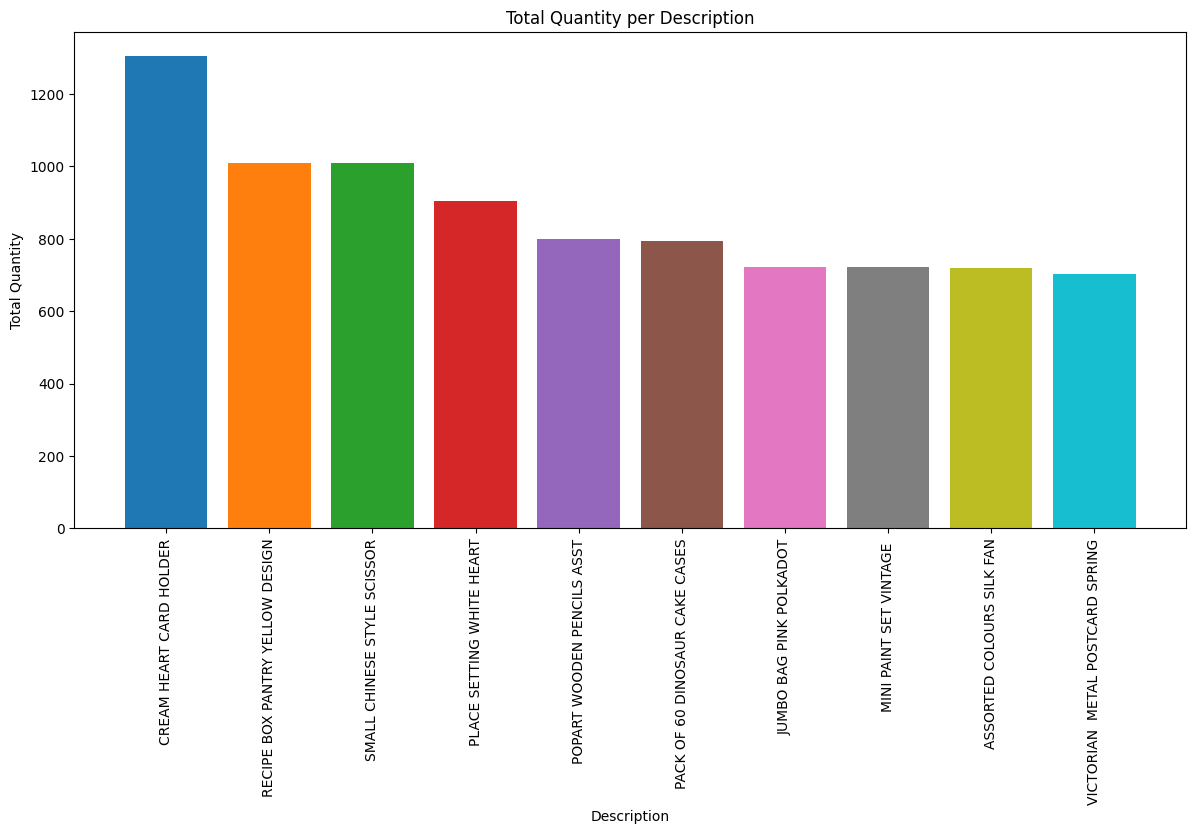

In [31]:
grouped = dataset.groupby('Description')['Quantity'].sum()

pl.figure(figsize=(12, 6))  

pl.xticks(rotation=90)  
pl.xlabel('Description')
pl.ylabel('Total Quantity')
pl.title('Total Quantity per Description')
pl.tight_layout()
top_descriptions = grouped.sort_values(ascending=False).head(10)
colors = pl.cm.tab10(range(len(top_descriptions)))


pl.bar(top_descriptions.index, top_descriptions.values, color=colors)
pl.show()

TOP SPENDING BY CUSTOMERS

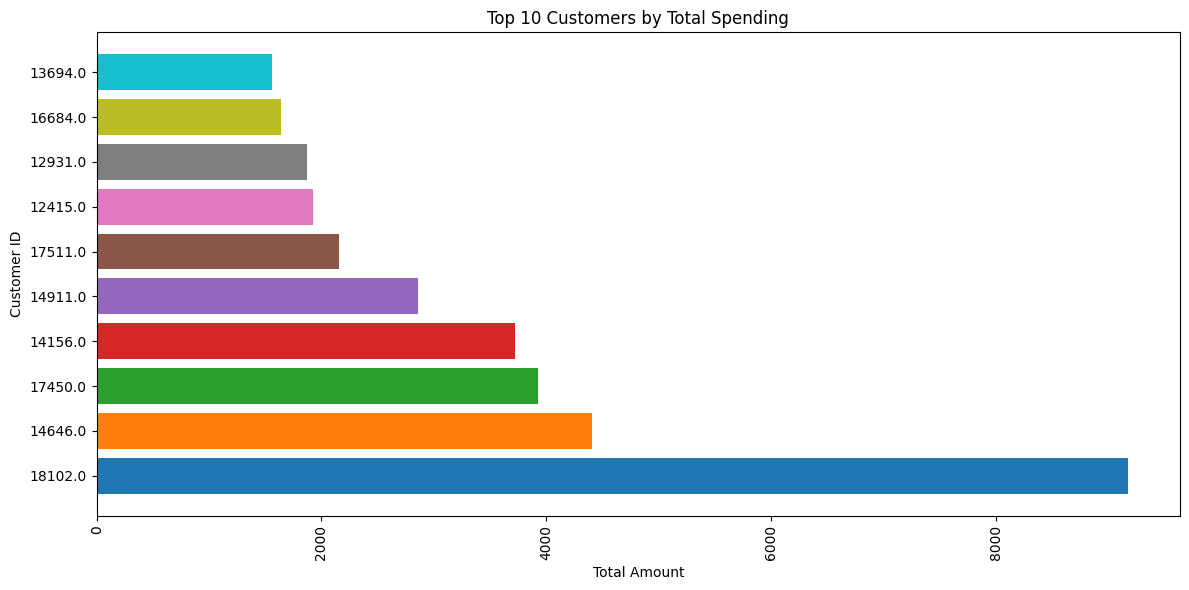

In [32]:
grouped = dataset.groupby('CustomerID')['Total_amount'].sum()

# Get top 10 customers by total spending
top_Customers = grouped.sort_values(ascending=False).head(10)

# Generate colors for each bar (using tab10 colormap)
colors = pl.cm.tab10(range(len(top_Customers)))

# Plotting
pl.figure(figsize=(12, 6))
pl.barh(top_Customers.index.astype(str), top_Customers.values, color=colors)
pl.xticks(rotation=90)
pl.ylabel('Customer ID')
pl.xlabel('Total Amount')
pl.title('Top 10 Customers by Total Spending')
pl.tight_layout()
pl.show()

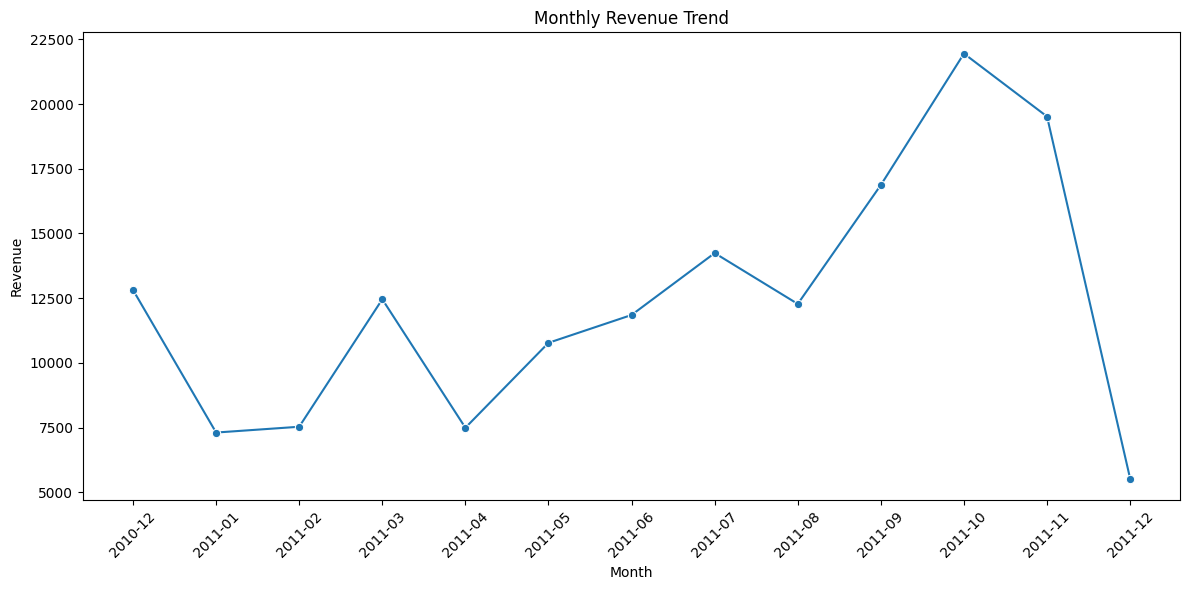

In [33]:
dataset['InvoiceYearMonth'] = dataset['InvoiceDate'].dt.to_period('M')
monthly_revenue = dataset.groupby('InvoiceYearMonth')['Total_amount'].sum().reset_index()
monthly_revenue['InvoiceYearMonth'] = monthly_revenue['InvoiceYearMonth'].astype(str)

pl.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue, x='InvoiceYearMonth', y='Total_amount', marker='o')
pl.xticks(rotation=45)
pl.title('Monthly Revenue Trend')
pl.xlabel('Month')
pl.ylabel('Revenue')
pl.tight_layout()
pl.show()

In [35]:
dataset.to_excel(w'C:\Users\student\Desktop\RIAA-1\data\cleaned_dataset.xlsx')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3005849453.py, line 1)